In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
aa =pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv")

In [4]:
aa.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [6]:
aa.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
aa[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64

In [8]:
aa[['Model']].value_counts()

Model                               
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Length: 1491, dtype: int64

In [9]:
aa[['Fuel']].value_counts()

Fuel    
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
dtype: int64

In [10]:
aa[['Seller_Type']].value_counts()

Seller_Type     
Individual          3244
Dealer               994
Trustmark Dealer     102
dtype: int64

In [11]:
aa[['Transmission']].value_counts()

Transmission
Manual          3892
Automatic        448
dtype: int64

In [12]:
aa[['Owner']].value_counts()

Owner               
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
dtype: int64

In [13]:
aa.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
aa.shape

(4340, 9)

In [15]:
aa.replace({'Fuel':{'Petrol':0, 'Diesel':1,'CNG' :2, 'LPG': 3, 'Electric' :4}},inplace=True)

In [16]:
aa.replace({ 'Seller_Type': {'Individual':0, 'Dealer': 1, 'Trustmark Dealer' :2}},inplace=True)

In [17]:
aa.replace({'Transmission':{'Manual': 0, 'Automatic':1}},inplace=True)

In [18]:
aa.replace({'Owner':{'First Owner': 0, 'Second Owner':1, 'Third Owner' :2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)

In [19]:
y = aa['Selling_Price']

In [20]:
y.shape

(4340,)

In [21]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [22]:
X=aa[['Year', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner']]

In [23]:
X.shape

(4340, 6)

In [24]:
X

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size = 0.3, random_state=192529)

In [27]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr =  LinearRegression()

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

In [32]:
y_pred.shape

(1302,)

In [33]:
y_pred

array([ 198699.43090482,  141027.96995141,  274086.76228376, ...,
       -383982.62861395,  471106.65069398,  942190.93102425])

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
mean_squared_error(y_test,y_pred)

243341049088.33176

In [36]:
mean_absolute_error(y_test,y_pred)

248086.58459976738

In [37]:
r2_score(y_test,y_pred)

0.42268642600347217

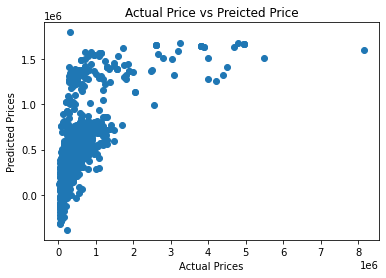

In [38]:
import matplotlib.pyplot as plt 
plt.scatter (y_test, y_pred) 
plt.xlabel("Actual Prices") 
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()



In [39]:
aa_new = aa.sample(1)

In [40]:
aa_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
291,Mahindra,Mahindra Marazzo M8 8Str,2018,1300000,10000,1,0,0,0


In [41]:
aa_new.shape

(1, 9)

In [42]:
X_new = aa_new.drop(['Brand', 'Model', 'Selling_Price'],axis =1)

In [43]:
y_pred_new= lr.predict(X_new)

In [44]:
y_pred_new

array([735386.78298245])